![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of NHL statistics.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'
data = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [4]:
data.drop(['Unnamed: 32'], axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

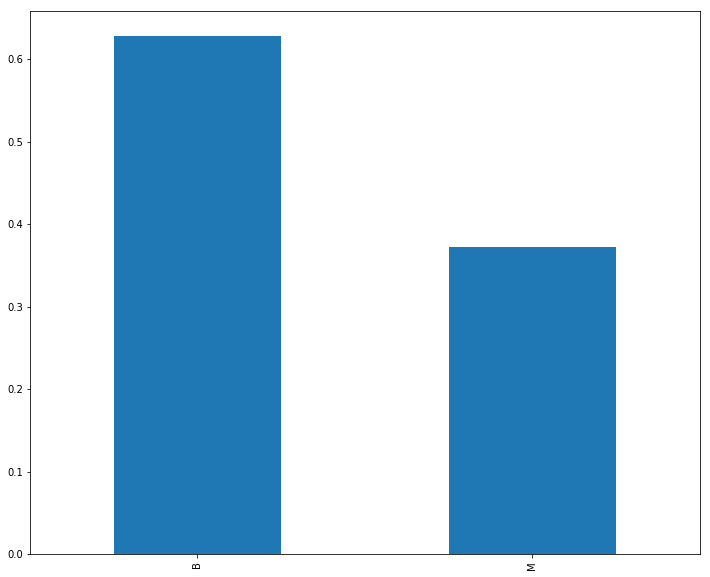

In [6]:
data['diagnosis'].value_counts(normalize=True).plot(kind='bar',figsize=(12,10));

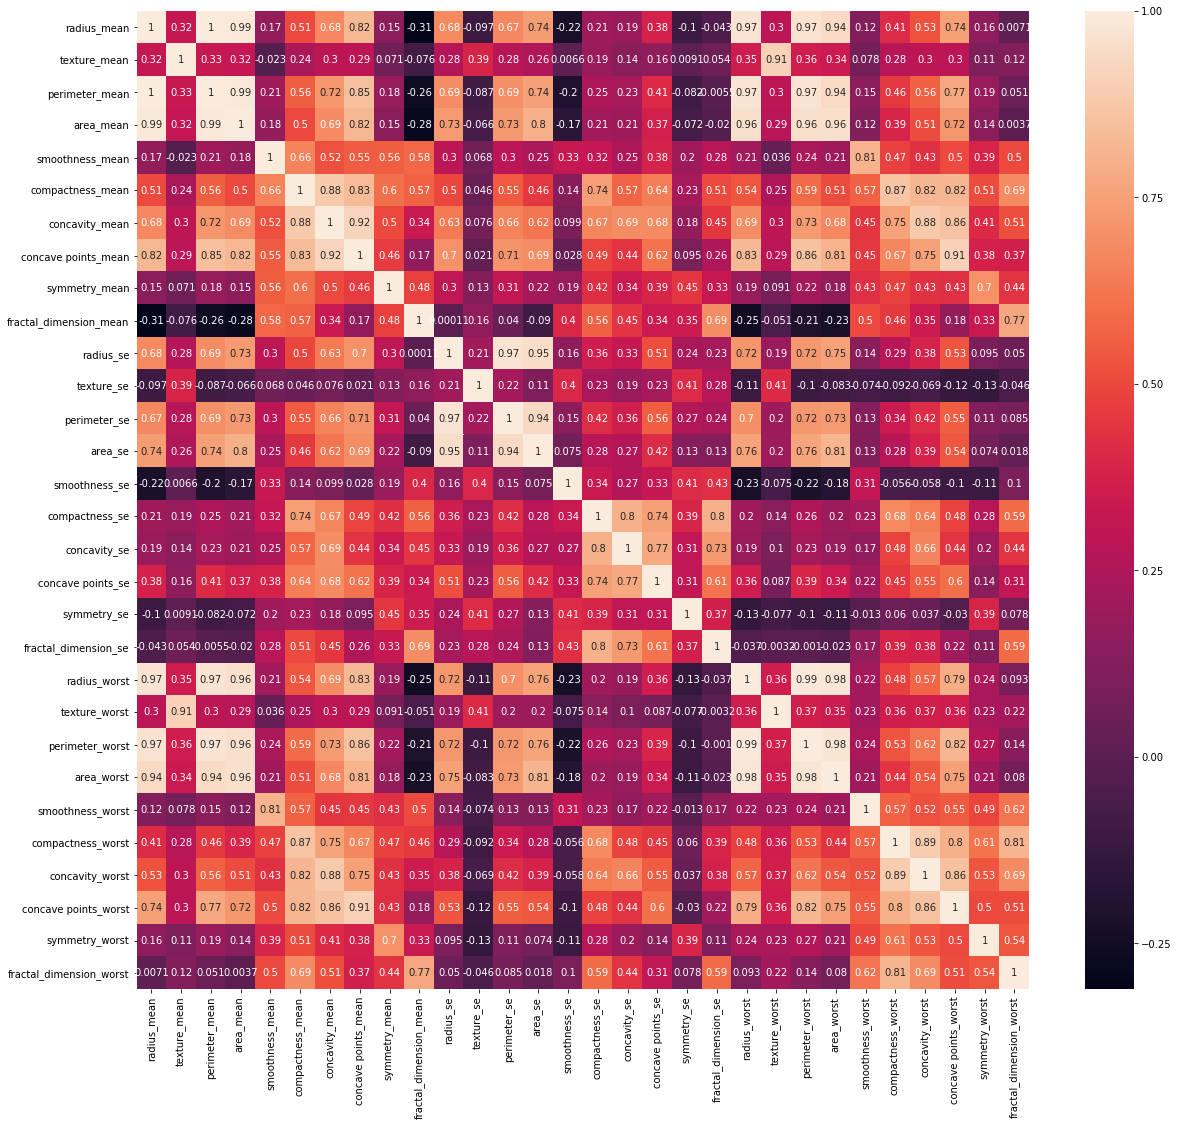

In [7]:
plt.subplots(figsize=(20,18))
sns.heatmap(data.corr(),annot=True);

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [8]:
# ANSWER
diagnosis_map = {'B': 1, 'M': 0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_map)

target_col = 'diagnosis'
y = data[target_col]


There are 2 unique values, so there are 2 classes in the target data set.

### 4. What is the baseline accuracy?

In [9]:
# ANSWER
#data['diagnosis'].sum()/data['diagnosis'].shape[0]
data['diagnosis'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [10]:
# ANSWER

feature_cols = list(set(data) - set([target_col]))

X =  data[feature_cols]

X.shape

(569, 30)

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [11]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
model = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline? *Yes*
- Is it legitimate? *No, we are using the entire data set so we are not actually predicting anything that hasn't been seen before.*

In [12]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values

pred = model.predict(X)
print (model.score(X,y))

1.0


In [13]:
def run_model(X_train, X_test, y_train, y_test, k=1):
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train,y_train)
    #pred = model.predict(X)
    #print (model.score(X_test,y_test))
    
    return model.score(X_test,y_test)

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [14]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# STEP 2: train the model on the training set (using K=1)
print (run_model(X_train, X_test, y_train, y_test, k=1))

# STEP 3: test the model on the testing set, and check the accuracy

0.9210526315789473


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [15]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
k = X_train.shape[0]
print (run_model(X_train, X_test, y_train, y_test, k=k))
# Fit Train Data

# Print accuracy_score

0.631578947368421


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [16]:
# ANSWER
# plot test accuracy by number of neighbors:
Ks = list(range(1,X_train.shape[0]))
score = []
for k in Ks:
    score.append(run_model(X_train, X_test, y_train, y_test, k=k))
    
    
print (len(Ks))
print (len(score))

454
454


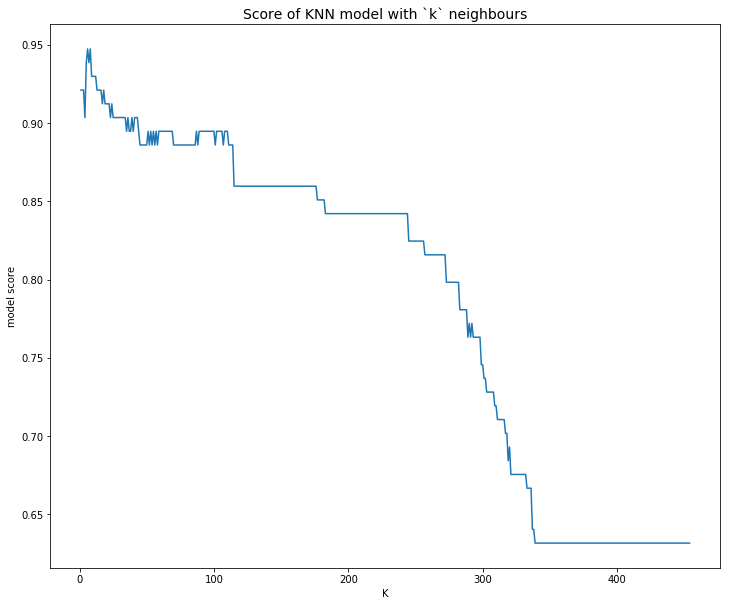

In [17]:
def plot_scores(Ks, score):
    scores = pd.DataFrame({'K': Ks, 'score': score})

    plt.figure(figsize=(12,10))
    plt.plot(scores['K'],scores['score'])
    plt.xlabel('K')
    plt.ylabel('model score')
    plt.title('Score of KNN model with `k` neighbours',fontsize=14)
    
    
plot_scores(Ks, score)

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


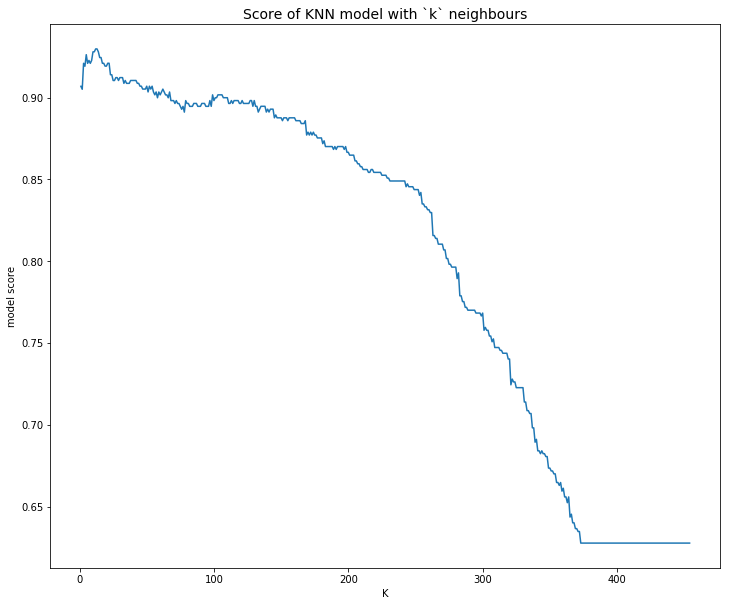

In [18]:
# ANSWER
from sklearn.model_selection import KFold

Ks = list(range(1,X_train.shape[0]))
mean_score = []
    
kf = KFold(n_splits=5)
for k in Ks:
    score = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        score.append(run_model(X_train, X_test, y_train, y_test, k=k))
    
    mean_score.append(np.mean(score))

    
plot_scores(Ks, mean_score)

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [19]:
# ANSWER
# Standarize X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

#Ks = list(range(1,X_train.shape[0]))
standardised_score = []
    
kf = KFold(n_splits=5)
for k in Ks:
    score = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = Xs[train_index], Xs[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        score.append(run_model(X_train, X_test, y_train, y_test, k=k))
    
    standardised_score.append(np.mean(score))

    


In [20]:
scores = pd.DataFrame({'K': Ks, 'Unstandardized': mean_score, 'Standardized': standardised_score})


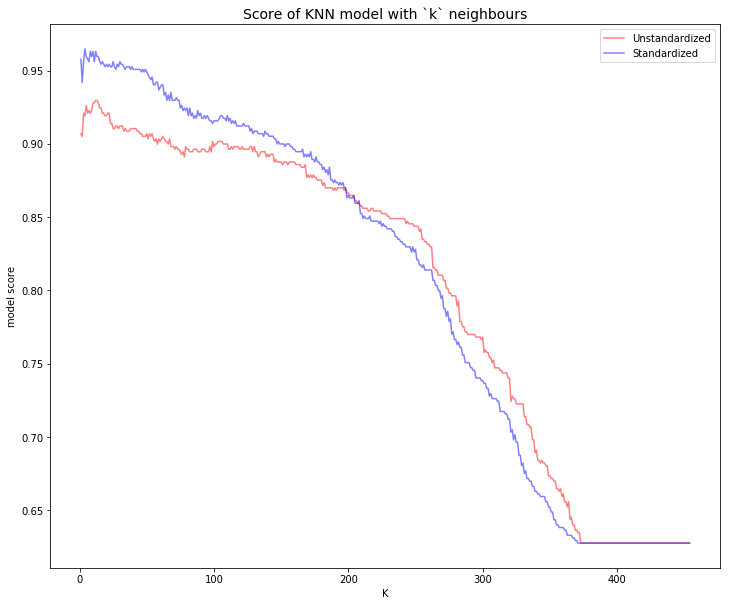

In [21]:
# ANSWER
# plot test accuracy by number of neighbors:
plt.figure(figsize=(12,10))
plt.plot(scores['K'],scores['Unstandardized'],color='red',alpha=0.5)
plt.plot(scores['K'],scores['Standardized'],color='blue',alpha=0.5)
plt.legend()
plt.xlabel('K')
plt.ylabel('model score')
plt.title('Score of KNN model with `k` neighbours',fontsize=14);

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

**© 2019 Data Science Institute of Australia**